In [31]:
# Car Price Prediction Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [32]:
# 1. Load dataset
df = pd.read_csv("car_prediction_data.csv")


In [33]:
# 2. Initial exploration
print(df.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [34]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [35]:
print(df.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [36]:
# 3. Data Cleaning (check missing values)
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


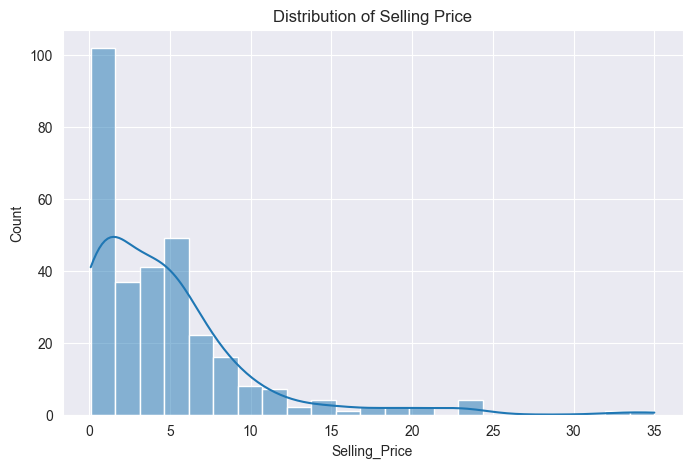

In [37]:
# 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,5))
sns.histplot(df["Selling_Price"], kde=True)
plt.title("Distribution of Selling Price")
plt.show()

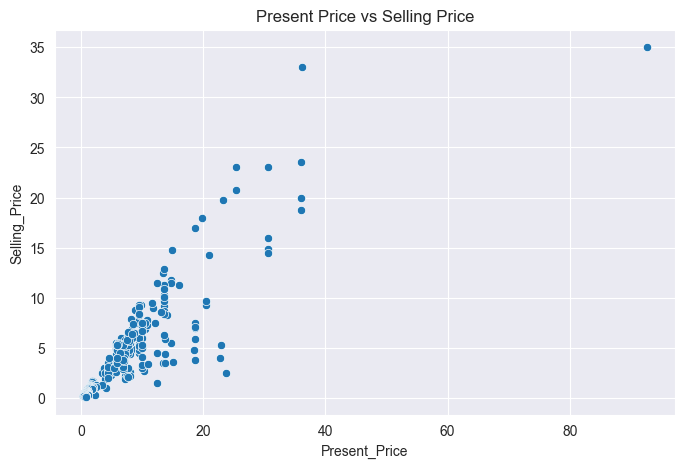

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Present_Price", y="Selling_Price", data=df)
plt.title("Present Price vs Selling Price")
plt.show()

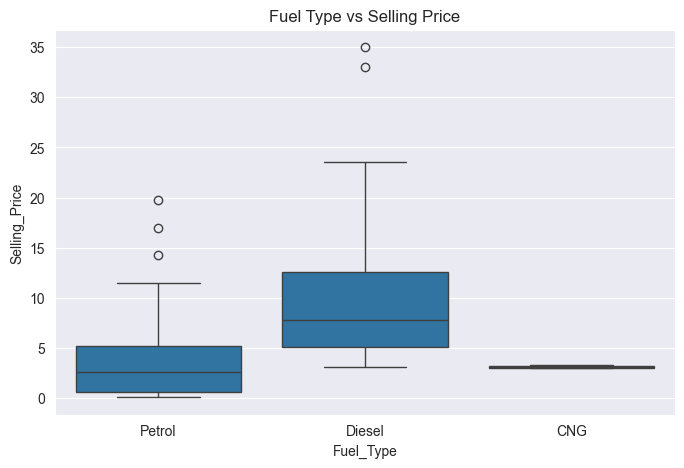

In [39]:

plt.figure(figsize=(8,5))
sns.boxplot(x="Fuel_Type", y="Selling_Price", data=df)
plt.title("Fuel Type vs Selling Price")
plt.show()

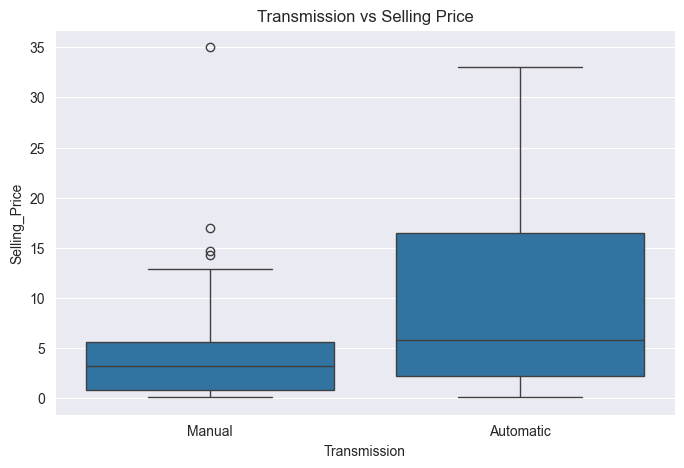

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Transmission", y="Selling_Price", data=df)
plt.title("Transmission vs Selling Price")
plt.show()

In [41]:
# 5. Preprocessing (convert categorical → numerical)
df = pd.get_dummies(df, drop_first=True)

In [42]:
# 6. Define features and target
X = df.drop(["Selling_Price"], axis=1)
y = df["Selling_Price"]

In [43]:
# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# 8. Train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [45]:
print("Decision Tree Results:")
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("MSE:", mean_squared_error(y_test, dt_pred))
print("R2 Score:", r2_score(y_test, dt_pred))

Decision Tree Results:
MAE: 0.6655737704918032
MSE: 1.1880950819672134
R2 Score: 0.948423488845238


In [46]:
# 9. Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [47]:
print("\nRandom Forest Results:")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R2 Score:", r2_score(y_test, rf_pred))


Random Forest Results:
MAE: 0.5871639344262295
MSE: 0.7622949068852457
R2 Score: 0.9669079416580986


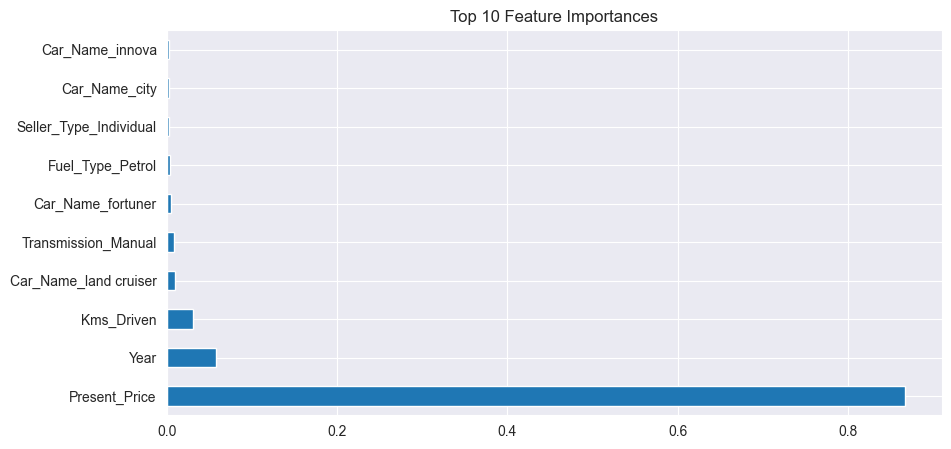

In [48]:
# 10. Feature Importance
plt.figure(figsize=(10,5))
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

In [49]:
# 11. Save Random Forest model as pkl
with open("car_price_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("Model saved as car_price_model.pkl")

Model saved as car_price_model.pkl


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import pickle

# Load dataset
df = pd.read_csv("car_prediction_data.csv")

X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

# Categorical and numerical columns
categorical_cols = ["Car_Name", "Fuel_Type", "Seller_Type", "Transmission"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessor
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", "passthrough", numerical_cols)
])

# Full pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

# Train
pipeline.fit(X, y)

# Save pipeline
with open("E:/Project/car_price_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)
